In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('wefarm_sample.csv')

# Data Preprocessing

In [47]:


df = df.copy()
df['question_sent'] = pd.to_datetime(df['question_sent'], utc=True)
df['response_sent'] = pd.to_datetime(df['response_sent'], utc=True)


df['response_time_minutes'] = (df['response_sent'] - df['question_sent']).dt.total_seconds() / 60
df.loc[df['response_time_minutes'] < 0, 'response_time_minutes'] = np.nan


df['response_words'] = df['response_content'].fillna('').str.split().apply(len)
df['response_chars'] = df['response_content'].fillna('').str.len()

df['year_month'] = df['response_sent'].dt.to_period('M').dt.to_timestamp()

df['question_language'] = df['question_language'].astype(str).str.lower().fillna('unknown')
df['response_language'] = df['response_language'].astype(str).str.lower().fillna('unknown')


df['lang_aligned'] = (df['question_language'] == df['response_language']).astype(int)





C:\Users\lradh\AppData\Local\Temp\ipykernel_21852\1662452409.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['response_sent'].dt.to_period('M').dt.to_timestamp()


In [28]:
df.head()

,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,...,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at,response_time_minutes,response_words,response_chars,lang_aligned
0,55850071,3629899,swa,s sungura dume hula watoto wake?,rabbit,2021-04-26 11:51:06.974369+00:00,55850563,3425421,swa,S81 hapana kwan w nani kakuamby sungura dume a...,...,farmer,blocked,tz,NaN,NaN,2020-11-08T15:48:34.053391+0000,12.923377,9,51,1
1,6293885,731267,eng,Q what vaccination should i give my newly boug...,chicken,2018-05-13 17:18:26.037976+00:00,6294088,702968,eng,Q95 Use Coccidio ?,...,farmer,zombie,ke,NaN,1978-01-11,2018-03-01T17:43:54.882102+0000,7.632274,4,18,1
2,14696598,1211168,nyn,Omuntu yahinga emiyembe nabasa kubona akatare?...,mango,2018-11-02 17:39:06.410910+00:00,14705602,370452,eng,E102 and Central markets mangoes are there so ...,...,farmer,zombie,ug,NaN,NaN,2017-09-18T12:47:34.000000+0000,28.857182,11,61,0
3,49023603,3055923,eng,"Q I want 2 start pigerly production ,but my k...",pig,2020-11-02 05:53:17.390882+00:00,49026463,3355913,eng,"Q21 Get maize brand,rice brand and pig booster...",...,farmer,live,ug,NaN,NaN,2020-10-04T04:36:14.852801+0000,131.297558,14,89,1
4,53393893,3037617,swa,S NI MBEGU GANI YA MAHINDI INAYOZAA SANA? Jibu...,maize,2021-02-10 18:06:16.291463+00:00,53394667,2570329,swa,S85 mbegu ya mahindi kuzaa sana hutegemea ukan...,...,farmer,live,tz,NaN,NaN,2019-10-11T03:47:49.641454+0000,13.931296,53,323,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   question_id                 200000 non-null  int64              
 1   question_user_id            200000 non-null  int64              
 2   question_language           200000 non-null  object             
 3   question_content            200000 non-null  object             
 4   question_topic              165176 non-null  object             
 5   question_sent               200000 non-null  datetime64[ns, UTC]
 6   response_id                 200000 non-null  int64              
 7   response_user_id            200000 non-null  int64              
 8   response_language           200000 non-null  object             
 9   response_content            200000 non-null  object             
 10  response_topic              63760 non-null  

In [31]:
sample_df = df[df["response_user_id"] != df["question_user_id"]]

# Setting Up Metrics

In [53]:
def compute_basic_metrics(df):
    g = df.groupby('response_user_id')
    out = g.agg(
    unique_questions_answered=('question_id', 'nunique'),
    unique_users_served=('question_user_id', 'nunique'),
    total_responses=('response_id', 'count'),
    median_response_time_min=('response_time_minutes', 'median'),
    mean_response_time_min=('response_time_minutes', 'mean'),
    median_response_words=('response_words', 'median'),
    mean_response_words=('response_words', 'mean'),
    total_words=('response_words', 'sum')
    ).reset_index()
    return out


In [55]:
basic = compute_basic_metrics(df)

In [56]:
basic.head()

,response_user_id,unique_questions_answered,unique_users_served,total_responses,median_response_time_min,mean_response_time_min,median_response_words,mean_response_words,total_words
0,20,1,1,1,289.572937,289.572937,39.0,39.00,39
1,29,4,4,4,728.579747,822.566127,4.0,3.75,15
2,83,1,1,1,1389.652211,1389.652211,4.0,4.00,4
3,88,4,4,4,871.462344,3024.880240,16.5,16.75,67
4,92,2,2,2,14.807092,14.807092,4.5,4.50,9


In [ ]:



def language_metrics(df):
    # entropy
    def entropy(series):
        p = series.value_counts(normalize=True)
        return -(p * np.log2(p + 1e-12)).sum()

    g = df.groupby('response_user_id')

    out = g.agg(
        num_response_languages=('response_language', 'nunique'),
        lang_entropy=('response_language', entropy),
        lang_alignment_frac=('lang_aligned', 'mean'),
        num_question_languages_answered=('question_language', 'nunique')
    ).reset_index()

    return out



In [51]:
language = language_metrics(df)

In [52]:
language

,response_user_id,num_response_languages,lang_entropy,lang_alignment_frac,num_question_languages_answered
0,20,1,-1.442823e-12,1.00,1
1,29,1,-1.442823e-12,1.00,1
2,83,1,-1.442823e-12,1.00,1
3,88,1,-1.442823e-12,1.00,1
4,92,1,-1.442823e-12,1.00,1
...,...,...,...,...,...
116804,3745919,1,-1.442823e-12,1.00,1
116805,3750401,2,8.112781e-01,0.75,1
116806,3822990,1,-1.442823e-12,1.00,1
116807,3830610,1,-1.442823e-12,1.00,1


In [71]:

from scipy.stats import zscore


def compute_consistency(df):
    monthly = df.groupby(['response_user_id', 'year_month']).size().reset_index(name='monthly_count')

    def gini(x):
        x = np.array(x, dtype=float)
        if x.sum() == 0:
            return 0
        x = np.sort(x)
        n = len(x)
        idx = np.arange(1, n+1)
        return (2 * (idx * x).sum() / (n * x.sum()) - (n + 1) / n)

    overall_months = (df['response_sent'].max().to_period('M') - df['response_sent'].min().to_period('M')).n + 1

    stats = monthly.groupby('response_user_id').agg(
        months_active=('year_month', 'nunique'),
        avg_monthly=('monthly_count', 'mean'),
        std_monthly=('monthly_count', 'std')
    ).reset_index().fillna(0)

    stats['cv_monthly'] = stats['std_monthly'] / stats['avg_monthly'].replace(0, np.nan)
    stats['prop_months_active'] = stats['months_active'] / overall_months

    gini_vals = monthly.groupby('response_user_id').apply(lambda g: gini(g['monthly_count']))
    gini_vals = gini_vals.reset_index().rename(columns={0: 'gini_monthly'})

    out = stats.merge(gini_vals, on='response_user_id', how='left')
    return out




In [48]:
cons = compute_consistency(df)

C:\Users\lradh\AppData\Local\Temp\ipykernel_21852\1592215577.py:20: UserWarning: Converting to Period representation will drop timezone information.
  overall_months = (df['response_sent'].max().to_period('M') - df['response_sent'].min().to_period('M')).n + 1
C:\Users\lradh\AppData\Local\Temp\ipykernel_21852\1592215577.py:31: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gini_vals = monthly.groupby('response_user_id').apply(lambda g: gini(g['monthly_count']))


In [49]:
cons

,response_user_id,months_active,avg_monthly,std_monthly,cv_monthly,prop_months_active,gini_monthly
0,20,1,1.000000,0.000000,0.000000,0.018182,0.000000
1,29,3,1.333333,0.577350,0.433013,0.054545,0.166667
2,83,1,1.000000,0.000000,0.000000,0.018182,0.000000
3,88,4,1.000000,0.000000,0.000000,0.072727,0.000000
4,92,2,1.000000,0.000000,0.000000,0.036364,0.000000
...,...,...,...,...,...,...,...
116804,3745919,2,1.000000,0.000000,0.000000,0.036364,0.000000
116805,3750401,3,2.666667,1.527525,0.572822,0.054545,0.250000
116806,3822990,1,1.000000,0.000000,0.000000,0.018182,0.000000
116807,3830610,1,1.000000,0.000000,0.000000,0.018182,0.000000


# Combining Metrics to get a Composite Leader Score

In [58]:


metrics = basic.merge(language, on='response_user_id', how='left').merge(cons, on='response_user_id', how='left')

dfm = metrics.set_index('response_user_id').copy()

dfm['inv_median_rt'] = -dfm['median_response_time_min']
dfm['consistency_score'] = dfm['prop_months_active'] - dfm['gini_monthly']

metrics_weights = {
    'unique_questions_answered': 0.25,
    'unique_users_served': 0.20,
    'inv_median_rt': 0.15,
    'mean_response_words': 0.10,
    'lang_alignment_frac': 0.10,
    'num_question_languages_answered': 0.05,
    'consistency_score': 0.15
}

    


In [59]:
dfm

,unique_questions_answered,unique_users_served,total_responses,median_response_time_min,mean_response_time_min,median_response_words,mean_response_words,total_words,num_response_languages,lang_entropy,lang_alignment_frac,num_question_languages_answered,months_active,avg_monthly,std_monthly,cv_monthly,prop_months_active,gini_monthly,inv_median_rt,consistency_score
response_user_id,,,,,,,,,,,,,,,,,,,,
20,1,1,1,289.572937,289.572937,39.0,39.00,39,1,-1.442823e-12,1.00,1,1,1.000000,0.000000,0.000000,0.018182,0.000000,-289.572937,0.018182
29,4,4,4,728.579747,822.566127,4.0,3.75,15,1,-1.442823e-12,1.00,1,3,1.333333,0.577350,0.433013,0.054545,0.166667,-728.579747,-0.112121
83,1,1,1,1389.652211,1389.652211,4.0,4.00,4,1,-1.442823e-12,1.00,1,1,1.000000,0.000000,0.000000,0.018182,0.000000,-1389.652211,0.018182
88,4,4,4,871.462344,3024.880240,16.5,16.75,67,1,-1.442823e-12,1.00,1,4,1.000000,0.000000,0.000000,0.072727,0.000000,-871.462344,0.072727
92,2,2,2,14.807092,14.807092,4.5,4.50,9,1,-1.442823e-12,1.00,1,2,1.000000,0.000000,0.000000,0.036364,0.000000,-14.807092,0.036364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745919,2,2,2,69.457509,69.457509,11.0,11.00,22,1,-1.442823e-12,1.00,1,2,1.000000,0.000000,0.000000,0.036364,0.000000,-69.457509,0.036364
3750401,4,3,8,23002.798561,23302.435801,3.5,6.00,48,2,8.112781e-01,0.75,1,3,2.666667,1.527525,0.572822,0.054545,0.250000,-23002.798561,-0.195455
3822990,1,1,1,192.188108,192.188108,5.0,5.00,5,1,-1.442823e-12,1.00,1,1,1.000000,0.000000,0.000000,0.018182,0.000000,-192.188108,0.018182


In [62]:
dfm.replace([np.inf, -np.inf], np.nan, inplace=True)

for col in metrics_weights:
    dfm[f'z_{col}'] = zscore(dfm[col].fillna(dfm[col].median()))

dfm['leader_score'] = sum(dfm[f'z_{col}'] * w for col, w in metrics_weights.items())

   

In [63]:
dfm.sort_values('leader_score', ascending=False)


,unique_questions_answered,unique_users_served,total_responses,median_response_time_min,mean_response_time_min,median_response_words,mean_response_words,total_words,num_response_languages,lang_entropy,...,inv_median_rt,consistency_score,z_unique_questions_answered,z_unique_users_served,z_inv_median_rt,z_mean_response_words,z_lang_alignment_frac,z_num_question_languages_answered,z_consistency_score,leader_score
response_user_id,,,,,,,,,,,,,,,,,,,,,
1364605,246,244,246,5.370314e+00,2.311067e+03,14.0,15.524390,3819,1,-1.442823e-12,...,-5.370314e+00,0.129582,93.580381,94.103623,0.118007,0.959666,0.228715,-0.067325,2.386226,42.706927
810401,208,205,209,9.211811e+00,5.032168e+03,10.0,21.698565,4535,2,1.365772e-01,...,-9.211811e+00,0.011675,79.024336,78.957158,0.117940,1.790334,0.126130,-0.067325,0.031195,35.758166
1049966,198,196,198,4.344310e+00,1.100824e+04,3.0,3.217172,637,2,3.870514e-01,...,-4.344310e+00,0.109343,75.193797,75.461820,0.118024,-0.696136,-0.177352,-0.067325,1.981983,34.115099
1458295,156,153,158,2.275722e+01,1.716899e+03,5.0,6.386076,1009,2,6.877696e-01,...,-2.275722e+01,-0.226966,59.105536,58.761871,0.117704,-0.269794,-0.755099,14.687219,-4.735292,26.467992
367428,141,138,142,2.359755e+01,1.412645e+04,12.0,20.823944,2957,2,6.047430e-02,...,-2.359755e+01,0.087708,53.359728,52.936308,0.117690,1.672663,0.190968,-0.067325,1.549849,24.360321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072799,1,1,1,1.399728e+06,1.399728e+06,3.0,3.000000,3,1,-1.442823e-12,...,-1.399728e+06,0.018182,-0.267809,-0.270505,-24.217013,-0.725354,-5.131373,-0.067325,0.161166,-4.318469
824350,1,1,1,1.477018e+06,1.477018e+06,1.0,1.000000,1,1,-1.442823e-12,...,-1.477018e+06,0.018182,-0.267809,-0.270505,-25.560747,-0.994432,-5.131373,-0.067325,0.161166,-4.546937
432422,1,1,1,1.690012e+06,1.690012e+06,2.0,2.000000,2,1,-1.442823e-12,...,-1.690012e+06,0.018182,-0.267809,-0.270505,-29.263761,-0.859893,0.228715,-0.067325,0.161166,-4.552926


# Vizualizing Results

In [ ]:


plt.style.use("ggplot")
sns.set(rc={"figure.figsize": (10, 6)})


top_leaders = dfm.sort_values("leader_score", ascending=False).head(20)
display(top_leaders[[
    "leader_score",
    "unique_questions_answered",
    "unique_users_served",
    "inv_median_rt",
    "mean_response_words",
    "lang_alignment_frac",
    "num_question_languages_answered",
    "consistency_score"
]])



,leader_score,unique_questions_answered,unique_users_served,inv_median_rt,mean_response_words,lang_alignment_frac,num_question_languages_answered,consistency_score
response_user_id,,,,,,,,
1364605,42.706927,246,244,-5.370314,15.524390,1.000000,1,0.129582
810401,35.758166,208,205,-9.211811,21.698565,0.980861,1,0.011675
1049966,34.115099,198,196,-4.344310,3.217172,0.924242,1,0.109343
1458295,26.467992,156,153,-22.757217,6.386076,0.816456,2,-0.226966
367428,24.360321,141,138,-23.597548,20.823944,0.992958,1,0.087708
3413249,21.901438,139,109,-1613.028127,4.987069,0.500000,2,-0.002775
1254217,16.540218,104,102,-11.648241,8.695238,0.961905,1,-0.346465
1151861,15.674649,89,88,-22.501769,11.222222,0.988889,1,0.190877
1149700,15.382675,92,92,-4.922718,23.500000,0.989130,1,-0.161364


C:\Users\lradh\AppData\Local\Temp\ipykernel_21852\3913490872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


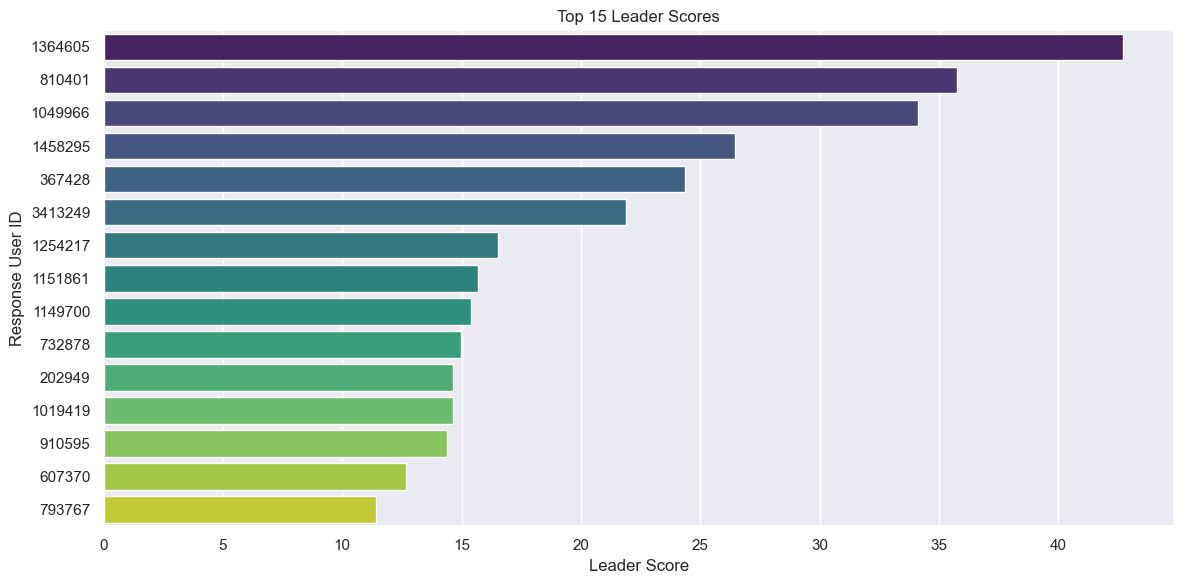

In [ ]:


top15 = dfm.sort_values("leader_score", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(
    y=top15.index.astype(str),
    x=top15["leader_score"],
    palette="viridis"
)
plt.title("Top 15 Leader Scores")
plt.xlabel("Leader Score")
plt.ylabel("Response User ID")
plt.tight_layout()
plt.show()


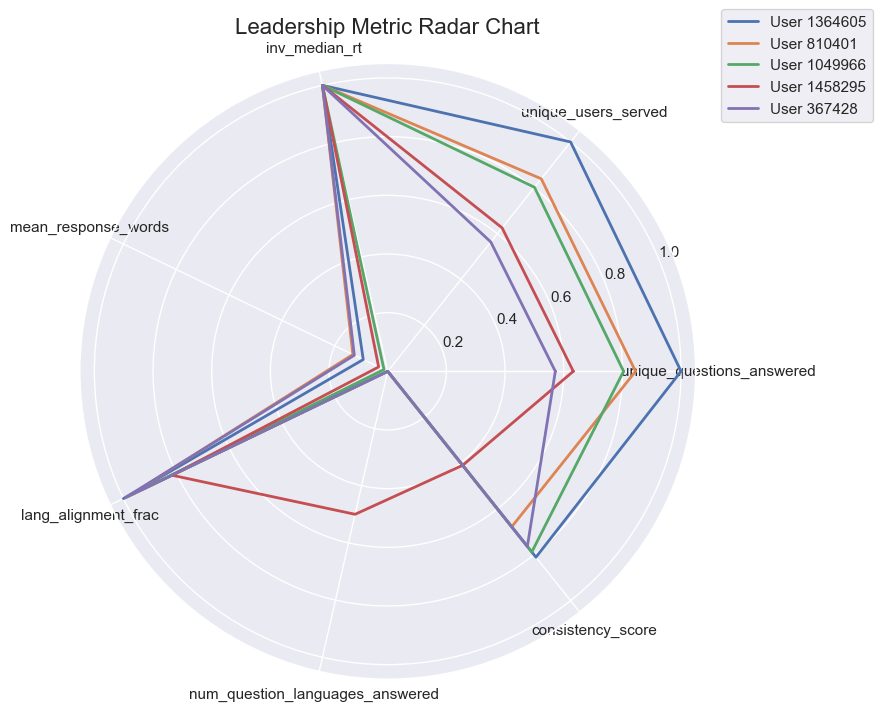

In [ ]:



def radar_chart(df, user_ids, metrics):
    # Normalize within metrics to [0,1]
    df_norm = (df[metrics] - df[metrics].min()) / (df[metrics].max() - df[metrics].min())

    labels = metrics
    n_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, n_vars, endpoint=False).tolist()
    angles += angles[:1]   # close loop

    plt.figure(figsize=(8, 8))

    for uid in user_ids:
        values = df_norm.loc[uid].tolist()
        values += values[:1]

        plt.polar(angles, values, linewidth=2, label=f"User {uid}")

    plt.title("Leadership Metric Radar Chart for top 5 Leaders", size=16)
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    plt.xticks(angles[:-1], labels)
    plt.show()


metrics_used = [
    'unique_questions_answered',
    'unique_users_served',
    'inv_median_rt',
    'mean_response_words',
    'lang_alignment_frac',
    'num_question_languages_answered',
    'consistency_score'
]

top5_ids = dfm.sort_values("leader_score", ascending=False).head(5).index.tolist()
radar_chart(dfm, top5_ids, metrics_used)


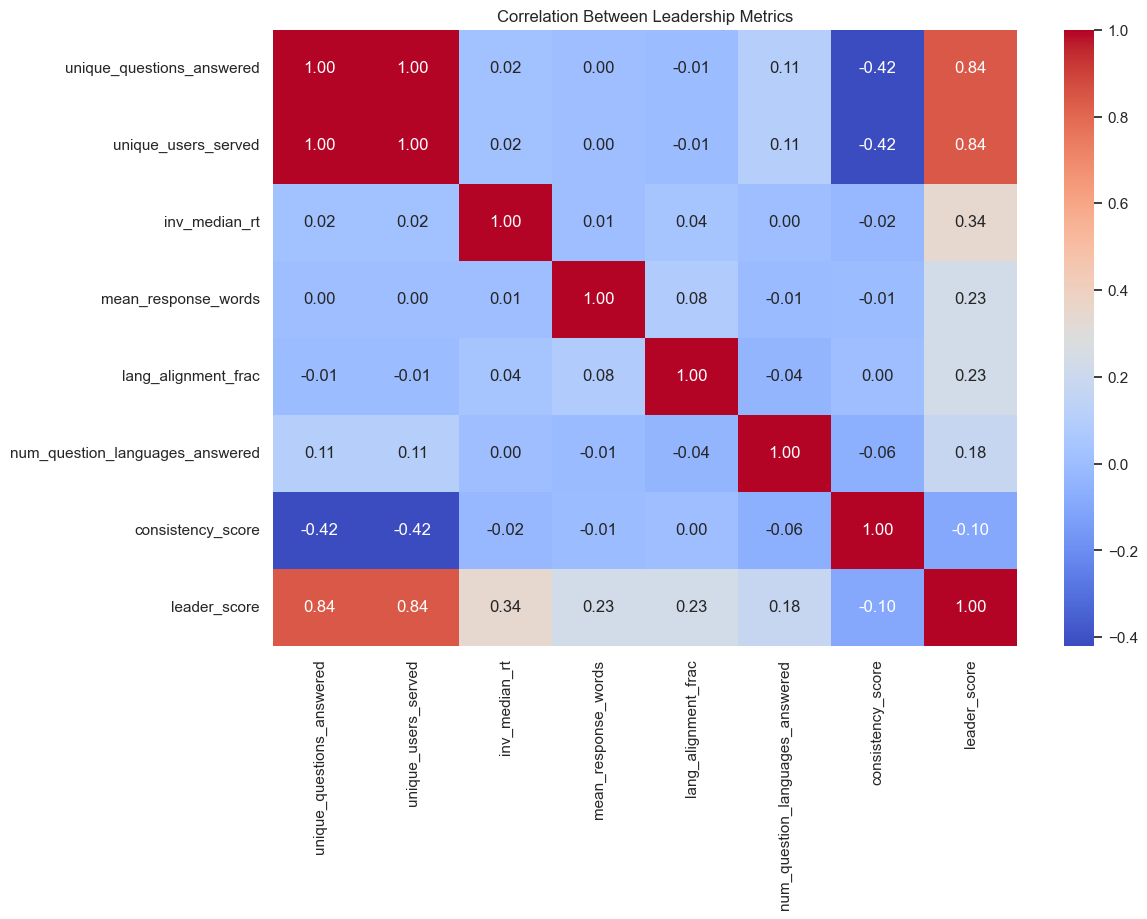

In [69]:
corr = dfm[metrics_used + ["leader_score"]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Leadership Metrics")
plt.show()

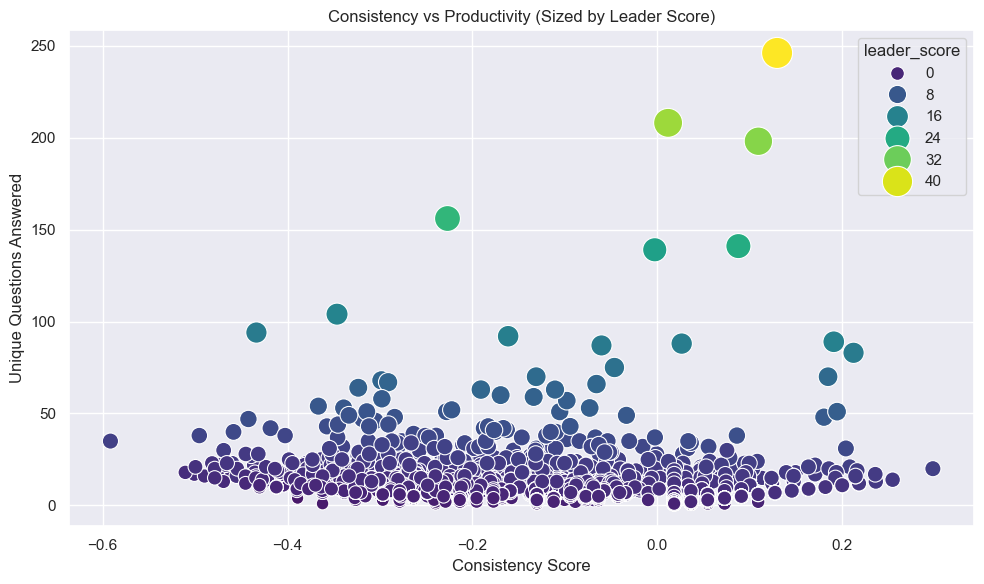

In [ ]:


plt.figure(figsize=(10,6))
sns.scatterplot(
    data=dfm,
    x="consistency_score",
    y="unique_questions_answered",
    size="leader_score",
    hue="leader_score",
    palette="viridis",
    sizes=(50, 500)
)

plt.title("Consistency vs Productivity (Sized by Leader Score)")
plt.xlabel("Consistency Score")
plt.ylabel("Unique Questions Answered")
plt.tight_layout()
plt.show()
